# Heart Disease Research Part II
In this project, we’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation.

In [58]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [25]:
df = pd.read_csv('heart_disease2.csv')
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    object 
 2   trestbps       303 non-null    float64
 3   chol           303 non-null    float64
 4   cp             303 non-null    object 
 5   exang          303 non-null    float64
 6   fbs            303 non-null    float64
 7   thalach        303 non-null    float64
 8   heart_disease  303 non-null    object 
dtypes: float64(6), object(3)
memory usage: 21.4+ KB
None


,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


# Predictors of Heart Disease


Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

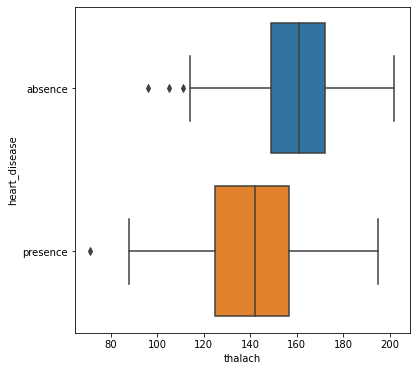

In [28]:
# box plot of `thalach` based on heart disease

plt.figure(figsize=(6,6))
sns.boxplot(x='thalach',y='heart_disease',data=df)
plt.show()

Based on this plot, patients diagnosed with heart disease generally had a lower maximum heart rate during their exercise test.

In [34]:
# calculate and print mean difference
thalach_hd = df.thalach[df.heart_disease == 'presence']
thalach_no_hd = df.thalach[df.heart_disease == 'absence']
mean_diff = thalach_no_hd.mean() - thalach_hd.mean()
median_diff = thalach_no_hd.median() - thalach_hd.median()

print('`thalach` mean Difference: ', mean_diff)
print('`thalach` median Difference: ', median_diff)

`thalach` mean Difference:  19.11905597473242
`thalach` median Difference:  19.0


# Finding 1
We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.


Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.

Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

In [36]:
# run two-sample t-test
t_stat,pval = ttest_ind(thalach_hd,thalach_no_hd)
print(pval)

3.456964908430172e-14


which is equivalent to 0.00000000000003457. This is less than 0.05, so we “reject the null hypothesis” and conclude that there is a significant difference in thalach for people with heart disease compared to people without heart disease.

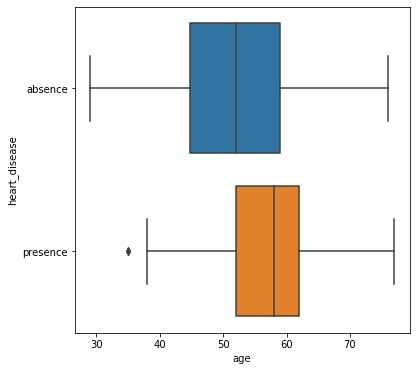

In [37]:
# investigating other quantitative variables
# Age
plt.figure(figsize=(6,6))
sns.boxplot(x='age',y='heart_disease',data=df)
plt.show()

Based on this plot, patients diagnosed with heart disease generally had higher age.

# Finding 2

In [39]:
# calculate and print mean difference
age_hd = df.age[df.heart_disease == 'presence']
age_no_hd = df.age[df.heart_disease == 'absence']
mean_diff =  age_hd.mean() - age_no_hd.mean()
median_diff = age_hd.median() - age_no_hd.median()

print('`age` mean Difference: ', mean_diff)
print('`age` median Difference: ', median_diff)

`age` mean Difference:  4.040533426917001
`age` median Difference:  6.0


In [40]:
# run two-sample t-test
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for `age` two-sample t-test: ', pval)

p-value for `age` two-sample t-test:  8.955636917529706e-05


This is less than 0.05, so we “reject the null hypothesis” and conclude that there is a significant difference in age for people with heart disease compared to people without heart disease.

# Finding 3

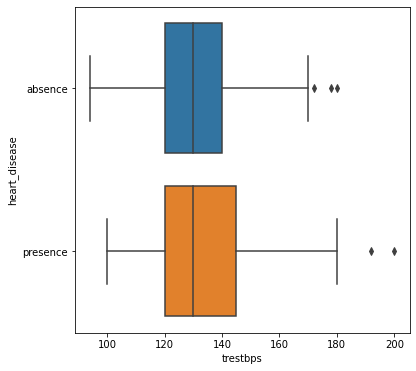

In [41]:
# trestbps
plt.figure(figsize=(6,6))
sns.boxplot(x='trestbps',y='heart_disease',data=df)
plt.show()

In [42]:
trestbps_hd = df.trestbps[df.heart_disease == 'presence']
trestbps_no_hd = df.trestbps[df.heart_disease == 'absence']
mean_diff =  trestbps_hd.mean() - trestbps_no_hd.mean()
median_diff = trestbps_hd.median() - trestbps_no_hd.median()

print('`trestbps` mean Difference: ', mean_diff)
print('`trestbps` median Difference: ', median_diff)

`trestbps` mean Difference:  5.318345323740999
`trestbps` median Difference:  0.0


In [43]:
# run two-sample t-test
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for `trestbps` two-sample t-test: ', pval)

p-value for `trestbps` two-sample t-test:  8.955636917529706e-05


This is less than 0.05, so we “reject the null hypothesis” and conclude that there is a significant difference in trestbps for people with heart disease compared to people without heart disease.

# Finding 4


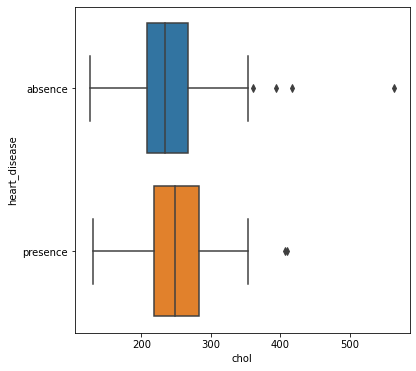

In [44]:
# chol
plt.figure(figsize=(6,6))
sns.boxplot(x='chol',y='heart_disease',data=df)
plt.show()

In [45]:
chol_hd = df.chol[df.heart_disease == 'presence']
chol_no_hd = df.chol[df.heart_disease == 'absence']
mean_diff =  chol_hd.mean() - chol_no_hd.mean()
median_diff = chol_hd.median() - chol_no_hd.median()

print('`chol` mean Difference: ', mean_diff)
print('`chol` median Difference: ', median_diff)

`chol` mean Difference:  8.834576241445887
`chol` median Difference:  14.5


In [46]:
# run two-sample t-test
tstat, pval = ttest_ind(chol_hd,chol_no_hd)
print('p-value for `chol` two-sample t-test: ', pval)

p-value for `chol` two-sample t-test:  0.13914167020436527


This is more than 0.05, so we  “Accept the null hypothesis” and conclude that there is no significant difference in cholestrol for people with heart disease compared to people without heart disease.

# Chest Pain and Max Heart Rate 
# Finding 5

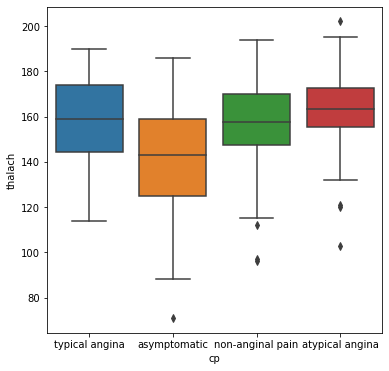

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(x='cp',y='thalach',data=df)
plt.show()

In [54]:
# save `thalach` based on `cp`
thalach_typical = df.thalach[df.cp == 'typical angina']
thalach_asymptom = df.thalach[df.cp == 'asymptomatic']
thalach_nonangin = df.thalach[df.cp == 'non-anginal pain']
thalach_atypical = df.thalach[df.cp == 'atypical angina']

# running ANOVA test
f_stat,pval = f_oneway(thalach_typical,thalach_asymptom,thalach_nonangin,thalach_atypical)
print('p-value for ANOVA: ', pval)
# run Tukey's range test
tukey_result = pairwise_tukeyhsd(df.thalach,df.cp)
print(tukey_result)

p-value for ANOVA:  1.9065505247705008e-10
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


For any pair where “Reject” is “True”, we conclude that people with those chest pain types have significantly different maximum heart rates during exercise.

Maybe surprisingly, people who are 'asymptomatic' seem to have a lower maximum heart rate (associated with heart disease) than people who have other kinds of chest pain.

# Heart Disease and Chest Pain
# Finding 6

Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.

Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

In [56]:
crosstab = pd.crosstab(df.cp,df.heart_disease)
crosstab

heart_disease,absence,presence
cp,,
asymptomatic,39,105
atypical angina,41,9
non-anginal pain,68,18
typical angina,16,7


In [59]:
chi2,pval,dof,expected = chi2_contingency(crosstab)
print(pval)

1.2517106007837527e-17


This is less than 0.05, so we “reject the null hypothesis” and conclude that there is association between chest pain type and whether or not someone is diagnosed with heart disease.